<a href="https://colab.research.google.com/github/jessyli48/COGS108_Repo/blob/main/FinalProject_group042.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Secret to Speed Dating: What do men and women look for in a partner? How does rating affect the decision to match?**

## **Permissions**

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [X] YES - make available
* [  ] NO - keep private

# **Overview**

Our team is primarily interested in understanding how the results of speed dating might be correlated with the rating of attributes in each participant's partner, in particular, whether there is a discrepancy between the importance of attributes among men and women participants and if these attributes affect an participant's ultimate decision. Prior to carrying out analysis on our data, we set out to do background research on studies that have been conducted relating to our topic, set up the data, underwent data cleaning, and conducted exploratory data analysis. Our analysis revealed some interesting results among men and women participants: attractiveness was found to be both the most important attribute to male participants and was weighed most in their final match decision; in contrast, intelligence was found to be the most important to female participants, however, attractiveness weighed most in their final match decision. 

# **Names**

- Carolyn Angel Le Duong
- Alex Nguyen
- Samantha J Susanto
- Theresa Sobocinski
- Jiaming (Jessy) Li


<a id='research_question'></a>
# **Research Question**

What attributes (sincerity, intelligence, ambition, funny, attractiveness, shared interests) are relatively more important to men and women during speed dating? Are the preferences of certain attributes over others reflected in the weights of ratings on the eventual decision to match or not with their partner?

<a id='background'></a>

## **Background & Prior Work**

Speed dating is an ancient Jewish tradition that has now become a phenomenon widespread at the international level. Participants are given 4 minutes to get to know each other before rotating partners. At the end of each round, participants are given a questionnaire asking to rate their date’s six attributes: attractiveness, sincerity, intelligence, fun, ambition, shared interests and whether they would want to meet again. Although speed dating is less common in this day and age, we found this question interesting because we wanted to determine what traits were most important between females and males when making a first impression.

Columbia Business School professors, Ray Fishman and Sheena Iyengar, were the professors to conduct the speed dating experiment. Their experiment revealed that “women put greater weight on the intelligence and the race of partner, while men respond more to physical attractiveness” and “men do not value women’s intelligence or ambition when it exceeds their own” [1]. Using that same experiment they also found that “females exhibit stronger racial preferences than males” [2].

References (include links):
- 1) https://www0.gsb.columbia.edu/mygsb/faculty/research/pubfiles/867/fisman%20iyengar.pdf 
- 2) https://www8.gsb.columbia.edu/researcharchive/articles/1367

# **Hypothesis**


We believe that males will find attractiveness as the most important attribute in determining whether or not they decide to match with their partner. While females will find intelligence to be the most important attribute. Males value appearances whereas females value intellect. Due to the sociocultural norms of the study’s setting, women of that time were more likely to depend on their spouse to be the provider of the house or family and therefore would seek intelligence over appearance. While males would be deterred by females who are more intelligent and ambitious than they are, perhaps from inherent toxic masculinity. The preferences of certain attributes over others will be reflected in the weights of ratings on the eventual decision to match or not with their partner.

# **Dataset(s)**

- Dataset Name: Speed-Dating_csv
- Link to the dataset: 'https://datahub.io/machine-learning/speed-dating/datapackage.json'
- Number of observations: 8373

Our data set of interest was taken from a speed dating experiment conducted by the Columbia Business School and includes 8378 observations and 123 columns (or variables) of speed dating participants at events taken place between 2002 to 2004. Each observation included data about the participant's demographic such as their age, gender, and race, in addition to their opinion on their partner in the form of ratings of six distinct attributes and whether or not they would like to see their date again.



# **Setup**

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Imports 
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
pd.set_option('display.max_columns', None)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import patsy
import statsmodels.api as sm
import scipy.stats as stats

import os
os.chdir("/content/drive/Shareddrives/COGS 108/Notebooks")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df=pd.read_csv("speed-dating_csv .csv")


In [ ]:
df

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,importance_same_race,importance_same_religion,d_importance_same_race,d_importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,d_attractive_o,d_sinsere_o,d_intelligence_o,d_funny_o,d_ambitous_o,d_shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,d_attractive_important,d_sincere_important,d_intellicence_important,d_funny_important,d_ambtition_important,d_shared_interests_important,attractive,sincere,intelligence,funny,ambition,d_attractive,d_sincere,d_intelligence,d_funny,d_ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,d_attractive_partner,d_sincere_partner,d_intelligence_partner,d_funny_partner,d_ambition_partner,d_shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,d_sports,d_tvsports,d_exercise,d_dining,d_museums,d_art,d_hiking,d_gaming,d_clubbing,d_reading,d_tv,d_theater,d_movies,d_concerts,d_music,d_shopping,d_yoga,interests_correlate,d_interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,0,1,female,21.0,27.0,6,[4-6],asian/pacific islander/asian-american,european/caucasian-american,0,2.0,4.0,[2-5],[2-5],law,35.0,20.0,20.0,20.0,0.0,5.0,[21-100],[16-20],[16-20],[16-20],[0-15],[0-15],6.0,8.0,8.0,8.0,8.0,6.0,[6-8],[6-8],[6-8],[6-8],[6-8],[6-8],15.0,20.0,20.0,15.0,15.0,15.0,[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],6.0,8.0,8.0,8.0,7.0,[6-8],[6-8],[6-8],[6-8],[6-8],6.0,9.0,7.0,7.0,6.0,5.0,[6-8],[9-10],[6-8],[6-8],[6-8],[0-5],9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],0.14,[0-0.33],3.0,2.0,4.0,[0-4],[0-3],[3-5],7.0,6.0,[6-8],[5-6],0.0,1,0,0
1,0,1,female,21.0,22.0,1,[0-1],asian/pacific islander/asian-american,european/caucasian-american,0,2.0,4.0,[2-5],[2-5],law,60.0,0.0,0.0,40.0,0.0,0.0,[21-100],[0-15],[0-15],[21-100],[0-15],[0-15],7.0,8.0,10.0,7.0,7.0,5.0,[6-8],[6-8],[9-10],[6-8],[6-8],[0-5],15.0,20.0,20.0,15.0,15.0,15.0,[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],6.0,8.0,8.0,8.0,7.0,[6-8],[6-8],[6-8],[6-8],[6-8],7.0,8.0,7.0,8.0,5.0,6.0,[6-8],[6-8],[6-8],[6-8],[0-5],[6-8],9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],0.54,[0.33-1],3.0,2.0,4.0,[0-4],[0-3],[3-5],7.0,5.0,[6-8],[5-6],1.0,1,0,0
2,1,1,female,21.0,22.0,1,[0-1],asian/pacific islander/asian-american,asian/pacific islander/asian-american,1,2.0,4.0,[2-5],[2-5],law,19.0,18.0,19.0,18.0,14.0,12.0,[16-20],[16-20],[16-20],[16-20],[0-15],[0-15],10.0,10.0,10.0,10.0,10.0,10.0,[9-10],[9-10],[9-10],[9-10],[9-10],[9-10],15.0,20.0,20.0,15.0,15.0,15.0,[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],6.0,8.0,8.0,8.0,7.0,[6-8],[6-8],[6-8],[6-8],[6-8],5.0,8.0,9.0,8.0,5.0,7.0,[0-5],[6-8],[9-10],[6-8],[0-5],[6-8],9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],0.16,[0-0.33],3.0,2.0,4.0,[0-4],[0-3],[3-5],7.0,NaN,[6-8],[0-4],1.0,1,1,1
3,0,1,female,21.0,23.0,2,[2-3],asian/pacific islander/asian-american,european/caucasian-american,0,2.0,4.0,[2-5],[2-5],law,30.0,5.0,15.0,40.0,5.0,5.0,[21-100],[0-15],[

# **Data Cleaning**

Firstly, we wanted to keep our columns of interest and exclude those that wouldn’t be particularly helpful in our study. For demographic purposes, we kept the participant's and the partner's gender, age, race, and field. Since our research question revolves around specific attributes(attractiveness, sincerity, intelligence, funny, ambition, and shared interests), we only kept those attributes and removed other attributes. Other attributes that were removed included religion, and specific shared interests such as sports, exercise, art, gaming, etc. Also, we wanted to investigate whether those attributes had an effect on the ratings and matching outcome. Therefore, we kept the columns relating to the participant's rating of their partner and the participant's decision to match or not with their partner.

In addition, there were columns that had typos in the variable names so we corrected the spelling.

In [ ]:
df = df[['gender','age','age_o','race','race_o','samerace','field',
    'attractive_important','sincere_important','intellicence_important',
   'funny_important','ambtition_important','shared_interests_important',
    'attractive_partner','sincere_partner','intelligence_partner','funny_partner',
    'ambition_partner','shared_interests_partner','decision']]
df = df.rename(columns={'intellicence_important': 'intelligence_important', 'ambtition_important':'ambition_important'})

Given we had 1544 observations with null values within the data set, we had to make a difficult decision on how to deal with those null values. First, we thought to replace the null values with zeros, however those zeros would greatly affect our analysis, as these values hold numerical meaning. Changing the null values to zeros would not be wise. The most probable reason for there being null values is because of no responses to the question. Therefore, instead of replacing the null values with zeros (or any other value), we decided to take those observations with null or missing values out. Before removal of these observations, our complete data set has 8378 rows or observations. After removal, we are now down to 6834 observations. We recognize that removing roughly 1500 observations could have an effect on the scope of our analysis. However, given our constraints, we feel that excluding the null or missing values will be even more beneficial to our analysis.

In [ ]:
null = df.isnull().any(axis=1).sum()
null

1544

In [ ]:
#Remove observations
df  = df[df.isnull().sum(axis=1)==0]

In [ ]:
df

,gender,age,age_o,race,race_o,samerace,field,attractive_important,sincere_important,intelligence_important,funny_important,ambition_important,shared_interests_important,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,decision
0,female,21.0,27.0,asian/pacific islander/asian-american,european/caucasian-american,0,law,15.0,20.0,20.0,15.0,15.0,15.0,6.0,9.0,7.0,7.0,6.0,5.0,1
1,female,21.0,22.0,asian/pacific islander/asian-american,european/caucasian-american,0,law,15.0,20.0,20.0,15.0,15.0,15.0,7.0,8.0,7.0,8.0,5.0,6.0,1
2,female,21.0,22.0,asian/pacific islander/asian-american,asian/pacific islander/asian-american,1,law,15.0,20.0,20.0,15.0,15.0,15.0,5.0,8.0,9.0,8.0,5.0,7.0,1
3,female,21.0,23.0,asian/pacific islander/asian-american,european/caucasian-american,0,law,15.0,20.0,20.0,15.0,15.0,15.0,7.0,6.0,8.0,7.0,6.0,8.0,1
4,female,21.0,24.0,asian/pacific islander/asian-american,latino/hispanic american,0,law,15.0,20.0,20.0,15.0,15.0,15.0,5.0,6.0,7.0,7.0,6.0,6.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8367,male,25.0,28.0,european/caucasian-american,other,0,climate dynamics,70.0,0.0,15.0,15.0,0.0,0.0,2.0,7.0,6.0,6.0,6.0,7.0,0
8368,male,25.0,26.0,european/caucasian-american,european/caucasian-american,1,climate dynamics,70.0,0.0,15.0,15.0,0.0,0.0,3.0,4.0,6.0,4.0,4.0,4.0,0
8369,male,25.0,22.0,european/caucasian-american,european/caucasian-american,1,climate dynamics,70.0,0.0,15.0,15.0,0.0,0.0,3.0,3.0,9.0,6.0,9.0,6.0,0
8370,male,25.0,27.0,european/caucasian-american,asian/pacific islander/asian-american,0,climate dynamics,70.0,0.0,15.0,15.0,0.0,0.0,2.0,7.0,9.0,8.0,7.0,8.0,0


# **Data Analysis & Results**

Exploratory data analysis (EDA) allows us to grasp a better understanding of our data set, ultimately easing us into answering our research question. Some concepts we will first address are structure, granularity, scope, temporality, and faithfulness.

### Structure
Firstly, the structure of our data (ie. the format of our data file) is tabular, since we are working with a CSV (comma-separated-value) file. Each observation takes up its own row. 6834 observations and 20 variables.

In [ ]:
df.shape

(6834, 20)

Checking the type of variable in each column. We kept the samerace and decision columns int types because it represents a qualitative variable (1 or 0 for yes or no)

In [ ]:
df.dtypes

gender                         object
age                           float64
age_o                         float64
race                           object
race_o                         object
samerace                        int64
field                          object
attractive_important          float64
sincere_important             float64
intelligence_important        float64
funny_important               float64
ambition_important            float64
shared_interests_important    float64
attractive_partner            float64
sincere_partner               float64
intelligence_partner          float64
funny_partner                 float64
ambition_partner              float64
shared_interests_partner      float64
decision                        int64
dtype: object

### Granularity
Secondly, the granularity of our data (ie. how fine/course each row and column is) is individual level granularity because each observation or row represents a single participant of the speed dating event. 

### Scope
Thirdly, the scope of our data (ie. how complete or helpful our data are with respect to our research question) is high because the data contains the relevant information needed to adequately answer our research question.


### Temporality
In addition, the temporality of our data contains speed dating events from 2000 - 2004.


### Faithfulness
Lastly, the faithfulness of our data (ie. how well the data captures "reality") is trustworthy because the values are reasonable and close to what we would expect to see and there does not seem to be any inconsistencies or indications of falsification.









We then created separate subset DataFrames for males (df_male) and females (df_female) to better understand the differences between the two during speed dating.

In [ ]:
df_male = df[df['gender']=='male'].reset_index(drop=True)
df_female = df[df['gender']=='female'].reset_index(drop=True)

In [ ]:
df_male

,gender,age,age_o,race,race_o,samerace,field,attractive_important,sincere_important,intelligence_important,funny_important,ambition_important,shared_interests_important,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,decision
0,male,27.0,21.0,european/caucasian-american,asian/pacific islander/asian-american,0,finance,35.0,20.0,20.0,20.0,0.0,5.0,6.0,8.0,8.0,8.0,8.0,6.0,0
1,male,27.0,24.0,european/caucasian-american,european/caucasian-american,1,finance,35.0,20.0,20.0,20.0,0.0,5.0,8.0,7.0,6.0,9.0,7.0,4.0,0
2,male,27.0,25.0,european/caucasian-american,european/caucasian-american,1,finance,35.0,20.0,20.0,20.0,0.0,5.0,7.0,8.0,6.0,5.0,8.0,4.0,0
3,male,27.0,23.0,european/caucasian-american,european/caucasian-american,1,finance,35.0,20.0,20.0,20.0,0.0,5.0,6.0,7.0,8.0,7.0,7.0,5.0,0
4,male,27.0,21.0,european/caucasian-american,european/caucasian-american,1,finance,35.0,20.0,20.0,20.0,0.0,5.0,6.0,8.0,8.0,8.0,7.0,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3485,male,25.0,28.0,european/caucasian-american,other,0,climate dynamics,70.0,0.0,15.0,15.0,0.0,0.0,2.0,7.0,6.0,6.0,6.0,7.0,0
3486,male,25.0,26.0,european/caucasian-american,european/caucasian-american,1,climate dynamics,70.0,0.0,15.0,15.0,0.0,0.0,3.0,4.0,6.0,4.0,4.0,4.0,0
3487,male,25.0,22.0,european/caucasian-american,european/caucasian-american,1,climate dynamics,70.0,0.0,15.0,15.0,0.0,0.0,3.0,3.0,9.0,6.0,9.0,6.0,0
3488,male,25.0,27.0,european/caucasian-american,asian/pacific islander/asian-american,0,climate dynamics,70.0,0.0,15.0,15.0,0.0,0.0,2.0,7.0,9.0,8.0,7.0,8.0,0


In [ ]:
df_female

,gender,age,age_o,race,race_o,samerace,field,attractive_important,sincere_important,intelligence_important,funny_important,ambition_important,shared_interests_important,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,decision
0,female,21.0,27.0,asian/pacific islander/asian-american,european/caucasian-american,0,law,15.0,20.0,20.0,15.0,15.0,15.0,6.0,9.0,7.0,7.0,6.0,5.0,1
1,female,21.0,22.0,asian/pacific islander/asian-american,european/caucasian-american,0,law,15.0,20.0,20.0,15.0,15.0,15.0,7.0,8.0,7.0,8.0,5.0,6.0,1
2,female,21.0,22.0,asian/pacific islander/asian-american,asian/pacific islander/asian-american,1,law,15.0,20.0,20.0,15.0,15.0,15.0,5.0,8.0,9.0,8.0,5.0,7.0,1
3,female,21.0,23.0,asian/pacific islander/asian-american,european/caucasian-american,0,law,15.0,20.0,20.0,15.0,15.0,15.0,7.0,6.0,8.0,7.0,6.0,8.0,1
4,female,21.0,24.0,asian/pacific islander/asian-american,latino/hispanic american,0,law,15.0,20.0,20.0,15.0,15.0,15.0,5.0,6.0,7.0,7.0,6.0,6.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3339,female,22.0,30.0,asian/pacific islander/asian-american,european/caucasian-american,0,mechanical engineering,20.0,20.0,10.0,15.0,5.0,30.0,7.0,7.0,8.0,6.0,7.0,5.0,0
3340,female,22.0,28.0,asian/pacific islander/asian-american,european/caucasian-american,0,mechanical engineering,20.0,20.0,10.0,15.0,5.0,30.0,7.0,8.0,8.0,8.0,7.0,8.0,1
3341,female,22.0,30.0,asian/pacific islander/asian-american,european/caucasian-american,0,mechanical engineering,20.0,20.0,10.0,15.0,5.0,30.0,6.0,8.0,8.0,8.0,7.0,6.0,0
3342,female,22.0,27.0,asian/pacific islander/asian-american,black/african american,0,mechanical engineering,20.0,20.0,10.0,15.0,5.0,30.0,6.0,8.0,7.0,6.0,6.0,6.0,0


Describing the quantitative data for df_male and df_female.

In [ ]:
df_male.describe()

,age,age_o,samerace,attractive_important,sincere_important,intelligence_important,funny_important,ambition_important,shared_interests_important,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,decision
count,3490.000000,3490.000000,3490.000000,3490.000000,3490.000000,3490.000000,3490.000000,3490.000000,3490.000000,3490.000000,3490.000000,3490.000000,3490.000000,3490.000000,3490.000000,3490.000000
mean,26.590831,26.072493,0.402865,26.481100,16.551181,19.770736,17.538344,8.702653,11.075175,6.432636,7.237679,7.276218,6.511605,6.591691,5.525215,0.488252
std,3.301932,3.649076,0.490544,13.293251,7.329711,6.701032,6.691578,5.918319,6.689430,1.849990,1.611224,1.496554,1.835315,1.715771,2.086396,0.499934
min,18.000000,19.000000,0.000000,6.670000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,23.000000,0.000000,19.570000,10.530000,17.000000,15.000000,5.000000,5.000000,5.000000,6.000000,6.000000,5.000000,5.000000,4.000000,0.000000
50%,27.000000,26.000000,0.000000,23.000000,17.390000,20.000000,18.000000,10.000000,10.000000,6.000000,7.000000,7.000000,7.000000,7.000000,5.000000,0.000000
75%,29.000000,28.000000,1.000000,30.000000,20.000000,23.260000,20.000000,12.500000,15.090000,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,1.000000
max,42.000000,55.000000,1.000000,100.000000,40.000000,42.860000,50.000000,53.000000,30.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


There are 3490 male participants. It looks like the mean age is around 26.6, with ages ranging between 18 and 42. By looking at the mean scores for the importance of the different attributes, there seems to be a greater importance on attractiveness (column “attractive_important) and less importance on ambition (column “ambition_important”).

In [ ]:
df_female.describe()

,age,age_o,samerace,attractive_important,sincere_important,intelligence_important,funny_important,ambition_important,shared_interests_important,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,decision
count,3344.000000,3344.000000,3344.000000,3344.000000,3344.000000,3344.000000,3344.000000,3344.000000,3344.000000,3344.000000,3344.000000,3344.000000,3344.000000,3344.000000,3344.000000,3344.000000
mean,25.883971,26.585526,0.395335,17.940736,18.320147,20.917309,17.302996,12.971630,12.487751,5.959181,7.114833,7.472339,6.308313,6.961722,5.427482,0.375897
std,3.587335,3.439905,0.488996,9.343366,6.572920,6.690273,5.440561,5.439284,5.663145,1.991808,1.839662,1.574046,2.044167,1.824903,2.182975,0.484426
min,19.000000,18.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,24.000000,0.000000,14.000000,15.000000,18.000000,15.000000,10.000000,10.000000,5.000000,6.000000,7.000000,5.000000,6.000000,4.000000,0.000000
50%,25.000000,27.000000,0.000000,15.380000,20.000000,20.000000,18.000000,15.000000,12.500000,6.000000,7.000000,8.000000,6.000000,7.000000,6.000000,0.000000
75%,28.000000,29.000000,1.000000,20.000000,20.000000,25.000000,20.000000,16.670000,16.000000,7.000000,8.000000,9.000000,8.000000,8.000000,7.000000,1.000000
max,55.000000,42.000000,1.000000,90.000000,47.000000,50.000000,40.000000,30.000000,30.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


There are 3344 female participants. It looks like the mean age is around 26, with ages ranging between 19 and 55. By looking at the mean scores for the importance of the different attributes, there seems to be a greater importance on intelligence (column “intelligence_important) and less importance on ambition (column “ambition_important”) and shared interests (column “shared_interests_important”).

Although we have separate dataframes for male and female participants, let’s create a neat and concise groupby on gender to look at the mean breakdowns.

In [ ]:
df.groupby('gender').mean()

,age,age_o,samerace,attractive_important,sincere_important,intelligence_important,funny_important,ambition_important,shared_interests_important,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,decision
gender,,,,,,,,,,,,,,,,
female,25.883971,26.585526,0.395335,17.940736,18.320147,20.917309,17.302996,12.971630,12.487751,5.959181,7.114833,7.472339,6.308313,6.961722,5.427482,0.375897
male,26.590831,26.072493,0.402865,26.481100,16.551181,19.770736,17.538344,8.702653,11.075175,6.432636,7.237679,7.276218,6.511605,6.591691,5.525215,0.488252


The average age of male participants is pretty close to that of female participants. Average values for the importance of different attributes vary a lot. Average partner ratings for both genders are pretty similar. The average decision for females shows that they chose to _not_ match with their partners more than males did. 

### Demographic: Race

Let’s also groupby race and look at means across the different races among males.

In [ ]:
df_male.groupby('race').mean()

,age,age_o,samerace,attractive_important,sincere_important,intelligence_important,funny_important,ambition_important,shared_interests_important,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,decision
race,,,,,,,,,,,,,,,,
asian/pacific islander/asian-american,25.704835,26.063613,0.277354,24.538855,19.289326,17.021094,16.390623,9.718422,13.041832,6.316794,7.278626,7.203562,6.430025,6.553435,5.543893,0.502545
black/african american,26.601399,25.972028,0.048951,25.552448,18.650350,20.587413,17.062937,7.573427,9.370629,7.000000,8.419580,8.307692,7.419580,7.685315,6.251748,0.580420
european/caucasian-american,26.821038,26.012851,0.542123,27.507749,15.242689,20.552123,18.017853,8.226644,10.610557,6.377392,7.129224,7.211090,6.402427,6.475012,5.353403,0.465017
latino/hispanic american,27.315068,26.319635,0.100457,26.162192,16.397808,20.278904,16.562009,10.262100,11.873973,6.502283,7.004566,7.321918,6.666667,6.812785,5.881279,0.452055
other,26.809129,26.456432,0.082988,24.706224,17.921992,20.980083,18.270539,8.792531,8.997095,6.892116,7.560166,7.427386,7.049793,6.883817,6.207469,0.622407


There does seem to be some variation amongst the races for the male participants!

Let’s also groupby race and look at means across the different races among females.


In [ ]:
df_female.groupby('race').mean()

,age,age_o,samerace,attractive_important,sincere_important,intelligence_important,funny_important,ambition_important,shared_interests_important,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,decision
race,,,,,,,,,,,,,,,,
asian/pacific islander/asian-american,25.897868,26.719416,0.228956,17.672503,19.358462,20.046442,16.634815,12.217879,14.070988,5.804714,6.843996,7.104938,6.207632,6.506173,5.281706,0.424242
black/african american,26.618090,26.256281,0.045226,20.265427,15.963015,18.599095,17.068241,15.853266,12.251457,6.180905,7.527638,7.939698,6.829146,7.507538,5.733668,0.517588
european/caucasian-american,25.691034,26.601371,0.609937,17.863906,17.614186,21.600331,17.955180,13.202284,11.798144,6.079383,7.350657,7.665334,6.415762,7.222730,5.525700,0.332953
latino/hispanic american,26.910959,26.520548,0.082192,15.793493,19.702055,22.446575,16.731507,13.109247,11.328425,5.491438,6.294521,7.109589,5.726027,6.647260,5.243151,0.390411
other,25.312796,26.289100,0.080569,20.490047,20.104739,18.996682,15.724645,11.332227,13.352133,6.052133,7.047393,7.483412,6.156398,6.639810,5.194313,0.374408


There does seem to be some variation amongst the races for the female participants!

Now we want to visually see the distribution of races for each gender.

Text(0, 0.5, 'Frequency')

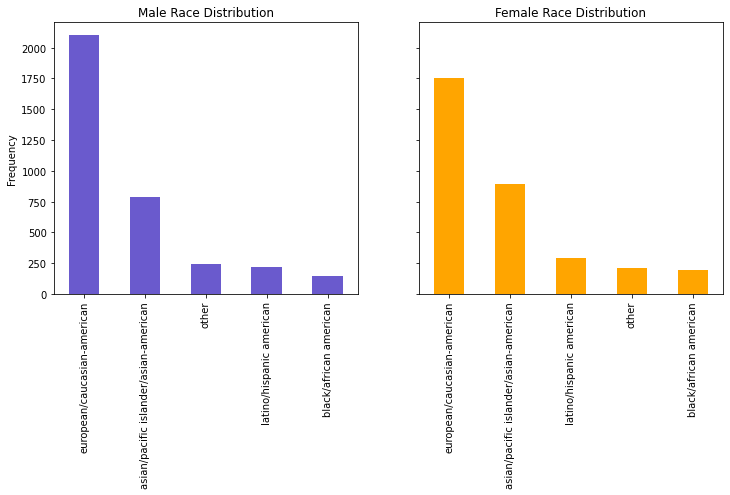

In [ ]:
figure, (axis_1, axis_2)= plt.subplots(1, 2,figsize=(12,5), sharey=True)
fem_race = df_female['race'].value_counts().plot(kind='bar', title='Female Race Distribution',color='orange', ax=axis_2)
male_race = df_male['race'].value_counts().plot(kind='bar', title='Male Race Distribution',color='slateblue', ax=axis_1)
male_race.set_ylabel('Frequency')


It appears that there were more European/ Caucasian-American participants for both genders. There also seems to be less Black/ African American participants for both genders too.

### Demographic: Age

Now we want to learn more about the age of participants.

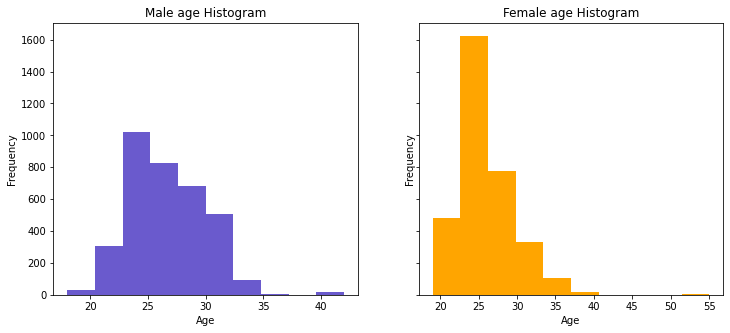

In [ ]:
#Age histogram for both genders
figure, axis = plt.subplots(1, 2,figsize=(12,5), sharey=True)
axis[0].hist(df_male['age'], color = 'slateblue')
axis[0].set_title('Male age Histogram')
axis[0].set_ylabel("Frequency")
axis[0].set_xlabel("Age")

axis[1].hist(df_female['age'], color = 'orange')
axis[1].set_title('Female age Histogram')
axis[1].set_ylabel("Frequency")
axis[1].set_xlabel("Age")
plt.show()

As the histogram above shows, the age distribution for males is more evenly distributed and skewed to the left. With a median of 27 years old and a mean of 26.6 years old. However, the mode for both distributions is the same in (22-27 years old). Furthermore, there does not appear to be an outlier in the male data.

On the other hand, there is an outlier of age above 50 years old for females. The mode age group for females participating in the study is 22-27 years old. The age distribution is skewed to the right. The mean is 26.1 years old while the median is 26 years old. There is a large difference between the mode and the rest of the age groups.


### Attribute importance

We wanted to see the breakdown of how males and females rank the importance of attributes. 

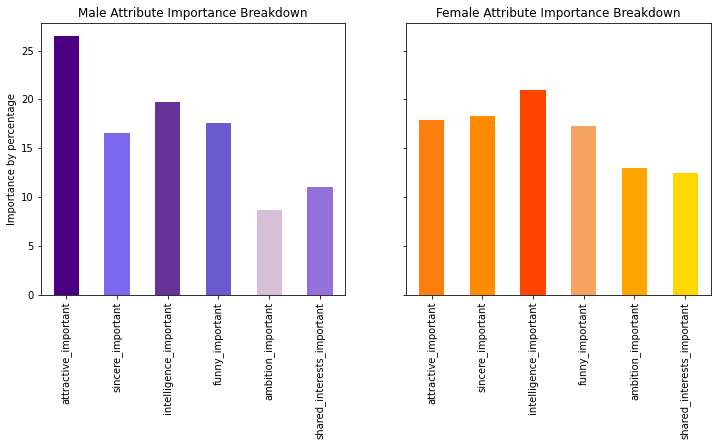

In [ ]:
df_f_imp_attribute = df_female[['attractive_important','sincere_important','intelligence_important',
            'funny_important','ambition_important','shared_interests_important']]
df_m_imp_attribute = df_male [['attractive_important','sincere_important','intelligence_important',
            'funny_important','ambition_important','shared_interests_important']]


figure, (ax1, ax2)= plt.subplots(1, 2,figsize=(12,5), sharey=True)
fem_axis = df_f_imp_attribute.mean().plot(kind='bar', title='Female Attribute Importance Breakdown'
                               , color=['tab:orange', 'darkorange','orangered','sandybrown','orange', 'gold'], ax=ax2)
male_axis = df_m_imp_attribute.mean().plot(kind='bar',title='Male Attribute Importance Breakdown'
                               , color=['indigo', 'mediumslateblue','rebeccapurple','slateblue','thistle', 'mediumpurple'], ax=ax1)
male_axis.set_ylabel("Importance by percentage")
plt.show()


Based on the plot above, the importance of attributes ranked from most important to least for males: Attractive, Intelligence, Funny, Sincere, Shared Interests, Ambition.

Based on the histogram the importance of attributes ranked from most important to least for females: Intelligence, Sincere, Attractive, Funny, Ambition, Shared Interests.

Now we want to see the overall distribution of percentage importance on average for each attribute. The x-axis represents importance out of a 100 for all the attributes and the y-axis represents how many people ranked that attribute at that importance percentage.

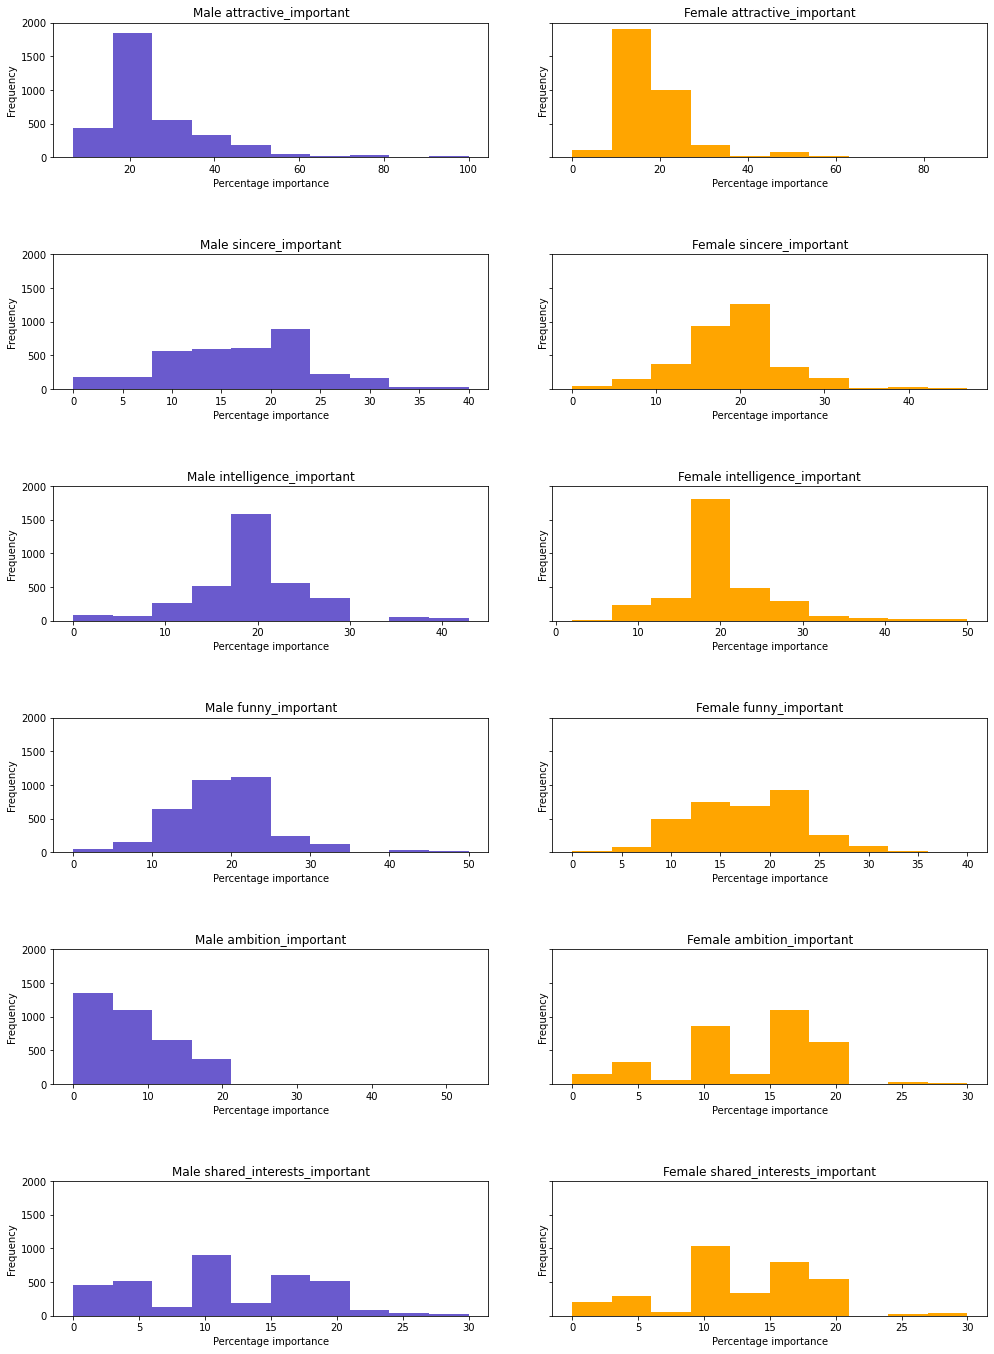

In [ ]:
# Histogram for important attribute columns for both genders
colnames = ['attractive_important','sincere_important','intelligence_important',
            'funny_important','ambition_important','shared_interests_important']
figure, axis = plt.subplots(6, 2,figsize=(15,20), sharey=True)
cnt = 0
for name in colnames:
    axis[cnt,0].hist(df_male[name], color = 'slateblue')
    axis[cnt,0].set_title('Male ' + name)
    axis[cnt,0].set_ylabel("Frequency")
    axis[cnt,0].set_xlabel('Percentage importance')

    axis[cnt,1].hist(df_female[name], color = 'orange')
    axis[cnt,1].set_title('Female ' + name)
    axis[cnt,1].set_ylabel("Frequency")
    axis[cnt,1].set_xlabel('Percentage importance')
    
   
    cnt+=1
figure.tight_layout(pad=5)
plt.show()


According to the previous data, the attribute males find the most important on average is attractiveness. This is also shown by the histogram above as attractive is the only attribute to not start at 0% and is also the only attribute with a result up until 100% important.

On the other hand, the attribute females find the most important on average is intelligence. This is also shown by the histogram as intelligence has the highest spike and is also the only attribute with an importance percentage over 50%.

Most of the other attributes, especially ambition and shared interests, all range in the low percentages. Shared interests have a large distribution showing that there is no trend for the general male participants that it is an individual preference. However, ambition had an overall low ranking for most males ranking it at 0-5% importance. Ambition and shared interests have a large distribution showing that there is no trend for the general female participants that it is an individual preference.



### Ratings

Lastly, we wanted to see the breakdown of decisions in relation to the rating of the partners. The histograms on the left side represent male ratings of their partners and their decisions (whether they want to see their partner again) and the histograms on the right side represent female ratings of their partners and their decisions.

The x-axis represents ratings of the partner for a particular attribute ranging on a scale of 0 to 10, with 0 being the least and 10 being the most. The y-axis represents the proportion of positive decisions (ie. wanting to match and meet their partner again).

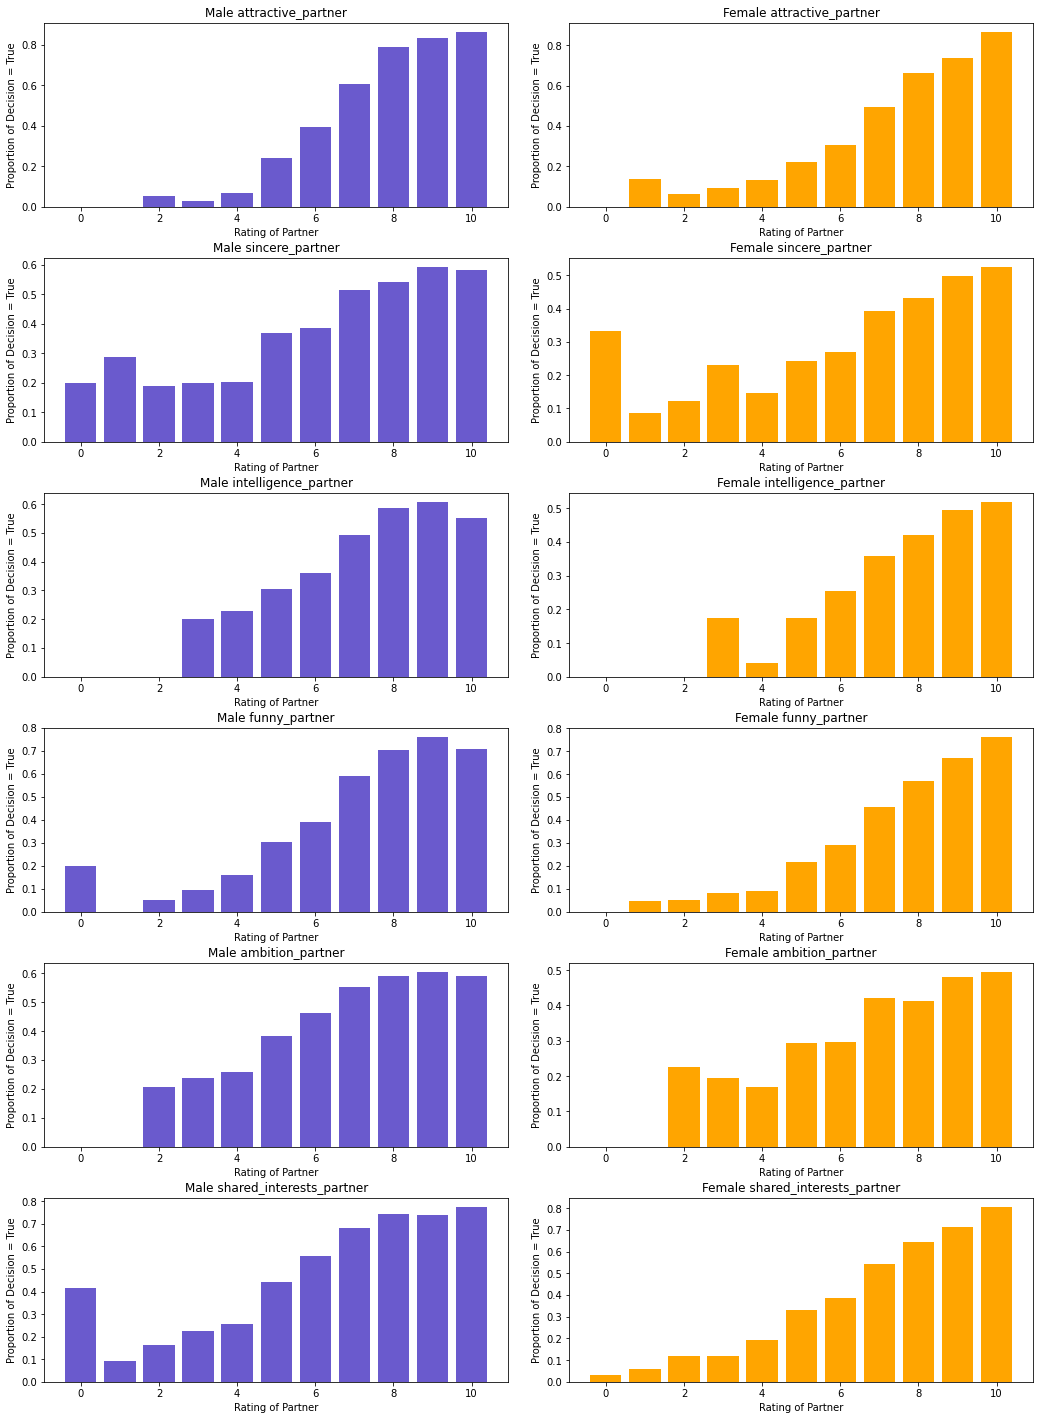

In [ ]:
cnames = ['attractive_partner','sincere_partner', 'intelligence_partner','funny_partner', 'ambition_partner', 'shared_interests_partner']
men = df[df['gender']=='male']
women = df[df['gender']=='female']

male_results  = {'attractive_partner':0,'sincere_partner':0,'intelligence_partner':0,
            'funny_partner':0,'ambition_partner':0,'shared_interests_partner':0}
female_results  = {'attractive_partner':0,'sincere_partner':0,'intelligence_partner':0,
            'funny_partner':0,'ambition_partner':0,'shared_interests_partner':0}

figure, axis = plt.subplots(6, 2,figsize=(15,20))
figure.tight_layout(pad=3.0)
for name in cnames:
    male_list = []
    female_list = []
    for i in np.arange(0,11):
        male_prob = men[men[name]==i]['decision'].sum()/len(men[men[name]==i]['decision'])
        female_prob = women[women[name]==i]['decision'].sum()/len(women[women[name]==i]['decision'])
        
        male_list.append(male_prob)
        female_list.append(female_prob)
        male_results[name]=male_list
        female_results[name]=female_list
        
cnt = 0
for key in female_results:
    m_y = male_results[key]
    x = [i for i in np.arange(0,11)]
    
    
    axis[cnt, 0].bar(x=x,height=m_y, color = 'slateblue')
    axis[cnt, 0].set_title('Male '+ key)
    axis[cnt,0].set_ylabel("Proportion of Decision = True")
    axis[cnt,0].set_xlabel("Rating of Partner")
    
    f_y = female_results[key]
    axis[cnt, 1].bar(x=x,height=f_y, color = 'orange')
    axis[cnt, 1].set_title('Female '+ key)
    axis[cnt,1].set_ylabel("Proportion of Decision = True")
    axis[cnt,1].set_xlabel("Rating of Partner")
    cnt+=1



Every histogram shows evidence towards a common trend, where higher ratings for a particular attribute of the partner resulted in higher probabilities in a positive decision. This can be seen with taller bars on the right hand side (higher ratings) and shorter bars on the left hand side (lower ratings) of the histograms.

For example, the first upper-left histogram describes male ratings of their partner’s attractiveness. For those that rated their partner a 10, the tall bar signifies that a great proportion of males that rated their partners a 10, made a positive decision -- in fact, greater than 80%. Similar interpretations can be made for the other histograms about the different attributes among males and females.

Now we want to visually see if there is a relationship between raw magnitude of the rating (0-10) and the decision to match or not to match.

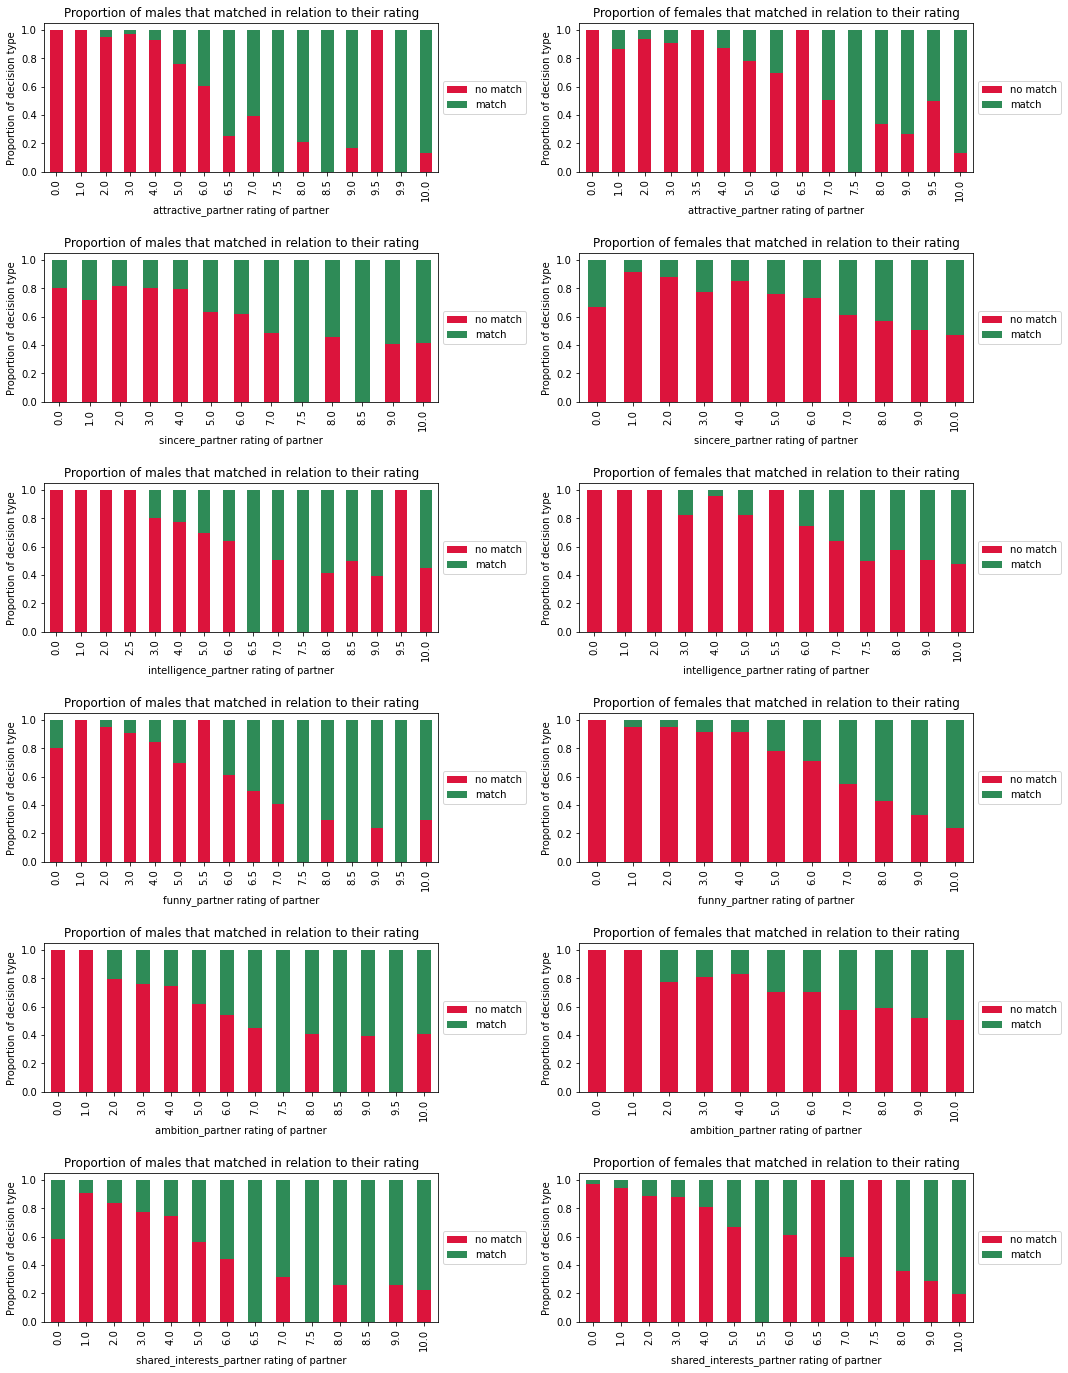

In [ ]:
cols = ['attractive_partner','sincere_partner','intelligence_partner'
        ,'funny_partner','ambition_partner','shared_interests_partner']

figure, axis = plt.subplots(6, 2,figsize=(15,20))
figure.tight_layout(pad=6.0,w_pad=11)
cnt = 0
for key in cols:
    
    #females
    df_female2 =df_female.groupby(['decision',key])['decision'].count().unstack(key).fillna(0)
    subdf_female2=np.transpose(df_female2.div(df_female2.sum()))

    # generate plot
    a = subdf_female2.plot(kind='bar', stacked=True, rot=90,
                  title='Proportion of females that matched in relation to their rating', color=['crimson', 'seagreen']
                       ,ax=axis[cnt,1])
    # customize plot
    a.legend(('no match','match'), loc='center left', bbox_to_anchor=(1.0, 0.5))
    a.set_ylabel("Proportion of decision type")
    a.set_xlabel(key +" rating of partner")
    
    #males 
    df_male2 =df_male.groupby(['decision',key])['decision'].count().unstack(key).fillna(0)
    subdf_male2=np.transpose(df_male2.div(df_male2.sum()))

    # generate plot
    male_ax = subdf_male2.plot(kind='bar', stacked=True, rot=90,
                      title='Proportion of males that matched in relation to their rating'
                               , color=['crimson', 'seagreen'],ax=axis[cnt,0])


    # customize plot
    male_ax.legend(('no match','match'), loc='center left', bbox_to_anchor=(1.0, 0.5))
    male_ax.set_ylabel("Proportion of decision type")
    male_ax.set_xlabel(key+ " rating of partner");

    cnt +=1

The stacked barplots above show a general trend of more people deciding to match with a partner when they rated that partner higher in each respective attribute. The bars that display either 100% match or no match at the higher end of the rating scale (x-axis) are analyzed with cautian as they are not representative of the true trend. Non-whole ratings, like .5 and .9, only represent a small portion of the observations and do not faithfully represent the trend. These will not be considered at face-value.

Since there is an obvious trend of ratings having an effect on the eventual decision to match, we will be looking at the weight of the ratings on the decision using logistic regression. The absolute value of the weights will be used since we are only interested in its magnitude.



In [ ]:
male_X = df_male[['attractive_partner','sincere_partner','intelligence_partner'
        ,'funny_partner','ambition_partner','shared_interests_partner']].values
male_y = df_male['decision']
male_X_train, male_X_test, male_y_train, male_y_test = train_test_split(male_X, male_y, test_size=0.33, random_state=42)
male_clf = LogisticRegression(random_state=1).fit(male_X_train, male_y_train)

print('male score train: ' + str(male_clf.score(male_X_train,male_y_train)))
print('male score test: ' + str(male_clf.score(male_X_test,male_y_test)))
print('male weights: ' + str(male_clf.coef_[0]))

male score train: 0.7591958939264328
male score test: 0.7465277777777778
male weights: [ 0.72406989 -0.19179695 -0.06021514  0.26455764 -0.19950318  0.28717634]


In [ ]:
female_X = df_female[['attractive_partner','sincere_partner','intelligence_partner'
        ,'funny_partner','ambition_partner','shared_interests_partner']].values
female_y = df_female['decision']
female_X_train, female_X_test, female_y_train, female_y_test = train_test_split(female_X, female_y, test_size=0.33, random_state=42)
female_clf = LogisticRegression(random_state=1).fit(female_X_train, female_y_train)

print('female score train: ' + str(female_clf.score(female_X_train,female_y_train)))
print('female score test: ' + str(female_clf.score(female_X_test,female_y_test)))
print('female weights: ' + str(female_clf.coef_[0]))

female score train: 0.7544642857142857
female score test: 0.7445652173913043
female weights: [ 0.465107   -0.10054095  0.15719065  0.2674298  -0.17512368  0.25422753]


In [ ]:
cols = ['attractive_partner','sincere_partner','intelligence_partner'
        ,'funny_partner','ambition_partner','shared_interests_partner']
weights =pd.DataFrame(np.column_stack([cols,abs(female_clf.coef_[0]),abs(male_clf.coef_[0])]),columns =['name','female','male'])
weights

,name,female,male
0,attractive_partner,0.4651070033071692,0.7240698944951778
1,sincere_partner,0.10054095376629835,0.19179695296263283
2,intelligence_partner,0.15719065409955532,0.06021514422404247
3,funny_partner,0.26742980429767305,0.26455764286606476
4,ambition_partner,0.17512367859905123,0.19950318423626257
5,shared_interests_partner,0.2542275318469137,0.2871763381846156


Males seem to value attractiveness heavier than the other qualities with a weight of 0.72 while valuing intelligence the least, with a weight of 0.06. 

Females also value attractiveness the most, with a weight of 0.46, while valuing sincerity the least with a weight of 0.10. As a result, we see that attractiveness for both genders is most important, while intelligence is the least important for men while sincerity is the least important for women. 

This is an interesting contrast to what we found in our analysis of attribute importance for each gender. Males view ambition to be the least important but it was actually intelligence that had the least weight in their decision to match. We found that females believe that intelligence is most important but attractiveness is what had the most weight when making their decision to match. Also, it was not shared interests that was the least important but sincerity that had the least weight on their decision to match with their partner. 

### Relationship between attribute importance, ratings, and decision to match

Scatterplots will help us visualize the relationship between attribute importance, attribute partner rating, and decision. We will just test with the attractive attribute to see if doing a scatterplot will give us useful information.


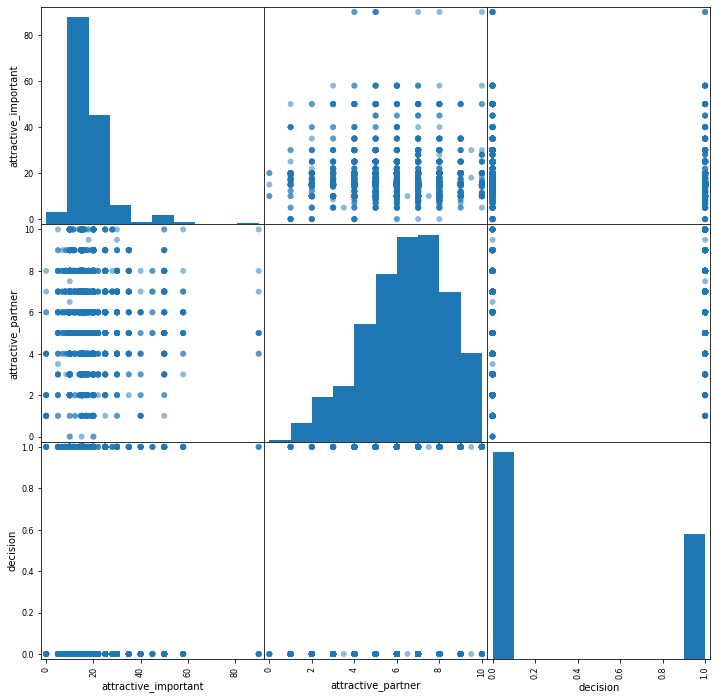

In [ ]:
pd.plotting.scatter_matrix(df_female[['attractive_important','attractive_partner','decision']], figsize=[12, 12], marker=12);

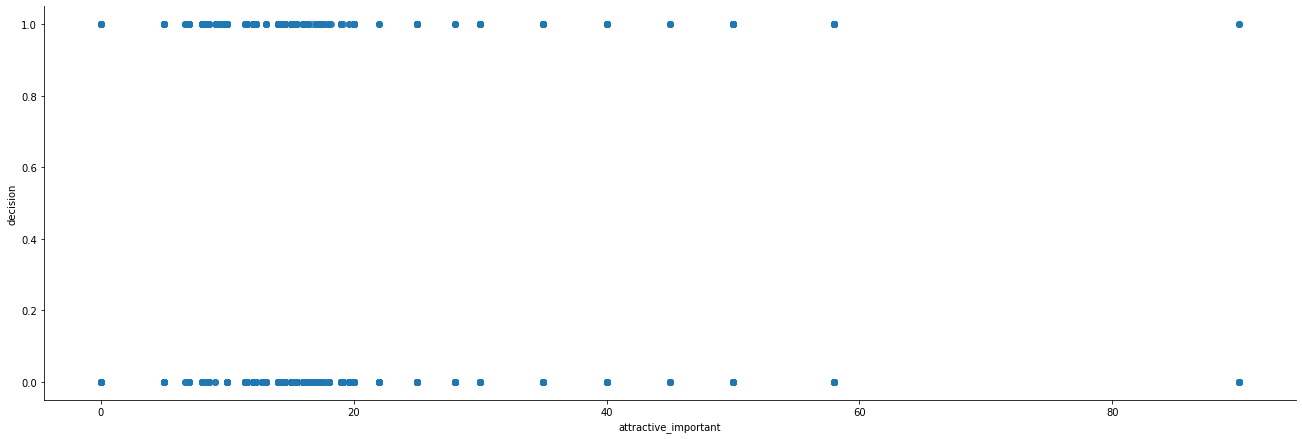

In [ ]:
sns.lmplot(x='attractive_important', y='decision', data=df_female, 
           fit_reg=False, height=6, aspect=3);

We cannot see relationships since the scales are different (continuous vs binary). So we will scale the ratings up so that each rating column sums up to 100 like the important attribute columns. 

In [ ]:
df['rating_sum'] = df.loc[:,'attractive_partner':'shared_interests_partner'].sum(axis = 1)

In [ ]:
def scale(str_in):
  percentage = (df[str_in]/df['rating_sum'])*100
  return round(percentage, 1)

In [ ]:
df['scaled_attractive_partner'] =  scale('attractive_partner')
df['scaled_sincere_partner'] =  scale('sincere_partner')
df['scaled_intelligence_partner'] =  scale('intelligence_partner')
df['scaled_funny_partner'] =  scale('funny_partner')
df['scaled_ambition_partner'] =  scale('ambition_partner')
df['scaled_shared_interests_partner'] =  scale('shared_interests_partner')

In [ ]:
df.head()

,gender,age,age_o,race,race_o,samerace,field,attractive_important,sincere_important,intelligence_important,funny_important,ambition_important,shared_interests_important,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,decision,rating_sum,scaled_attractive_partner,scaled_sincere_partner,scaled_intelligence_partner,scaled_funny_partner,scaled_ambition_partner,scaled_shared_interests_partner
0,female,21.0,27.0,asian/pacific islander/asian-american,european/caucasian-american,0,law,15.0,20.0,20.0,15.0,15.0,15.0,6.0,9.0,7.0,7.0,6.0,5.0,1,40.0,15.0,22.5,17.5,17.5,15.0,12.5
1,female,21.0,22.0,asian/pacific islander/asian-american,european/caucasian-american,0,law,15.0,20.0,20.0,15.0,15.0,15.0,7.0,8.0,7.0,8.0,5.0,6.0,1,41.0,17.1,19.5,17.1,19.5,12.2,14.6
2,female,21.0,22.0,asian/pacific islander/asian-american,asian/pacific islander/asian-american,1,law,15.0,20.0,20.0,15.0,15.0,15.0,5.0,8.0,9.0,8.0,5.0,7.0,1,42.0,11.9,19.0,21.4,19.0,11.9,16.7
3,female,21.0,23.0,asian/pacific islander/asian-american,european/caucasian-american,0,law,15.0,20.0,20.0,15.0,15.0,15.0,7.0,6.0,8.0,7.0,6.0,8.0,1,42.0,16.7,14.3,19.0,16.7,14.3,19.0
4,female,21.0,24.0,asian/pacific islander/asian-american,latino/hispanic american,0,law,15.0,20.0,20.0,15.0,15.0,15.0,5.0,6.0,7.0,7.0,6.0,6.0,1,37.0,13.5,16.2,18.9,18.9,16.2,16.2


Now let's see if normalizing the ratings will help us see the relationship between the attribute importance, ratings, and the decision using a scatter matrix.

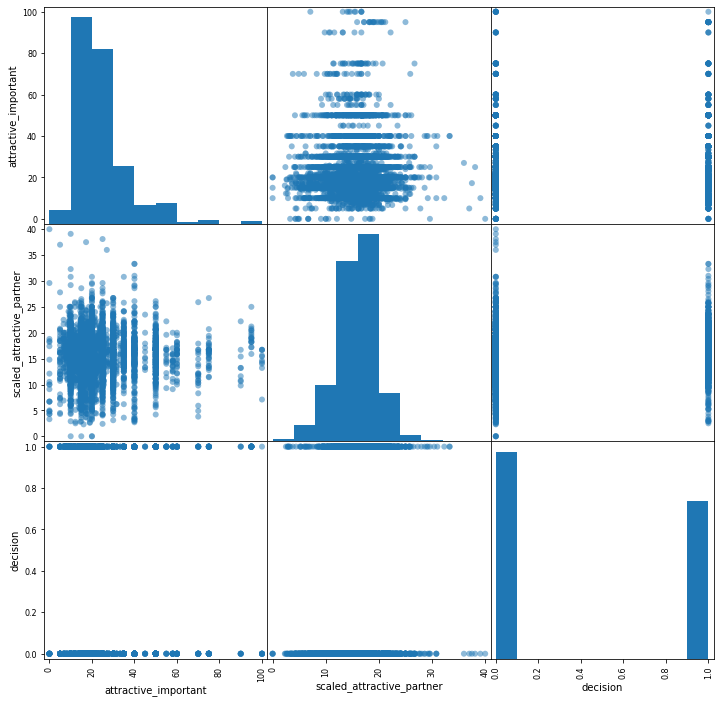

In [ ]:
pd.plotting.scatter_matrix(df[['attractive_important','scaled_attractive_partner', 'decision']], figsize=[12, 12], marker=12);

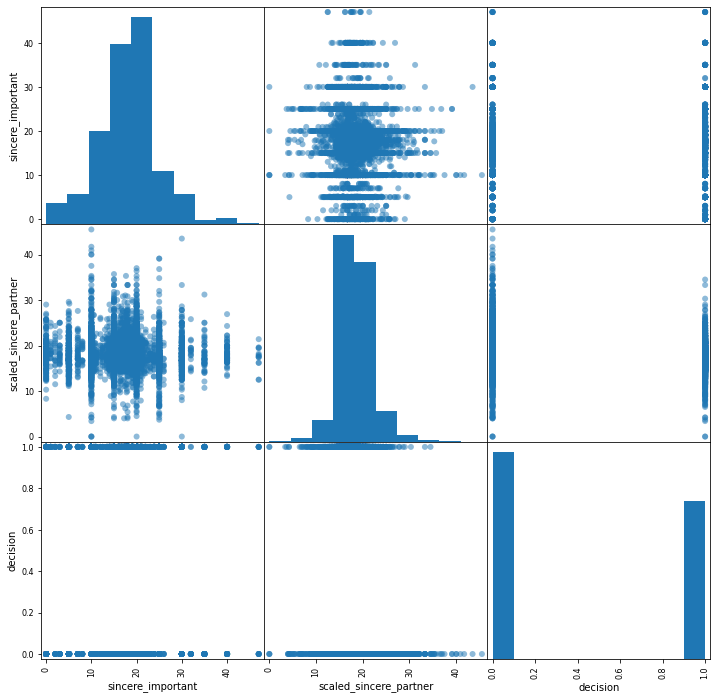

In [ ]:
pd.plotting.scatter_matrix(df[['sincere_important','scaled_sincere_partner', 'decision']], figsize=[12, 12], marker=12);

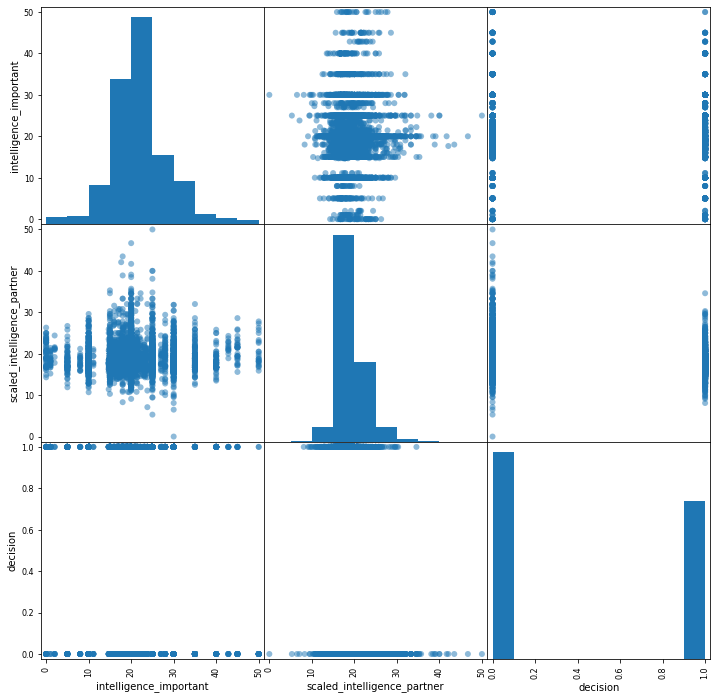

In [ ]:
pd.plotting.scatter_matrix(df[['intelligence_important','scaled_intelligence_partner', 'decision']], figsize=[12, 12], marker=12);

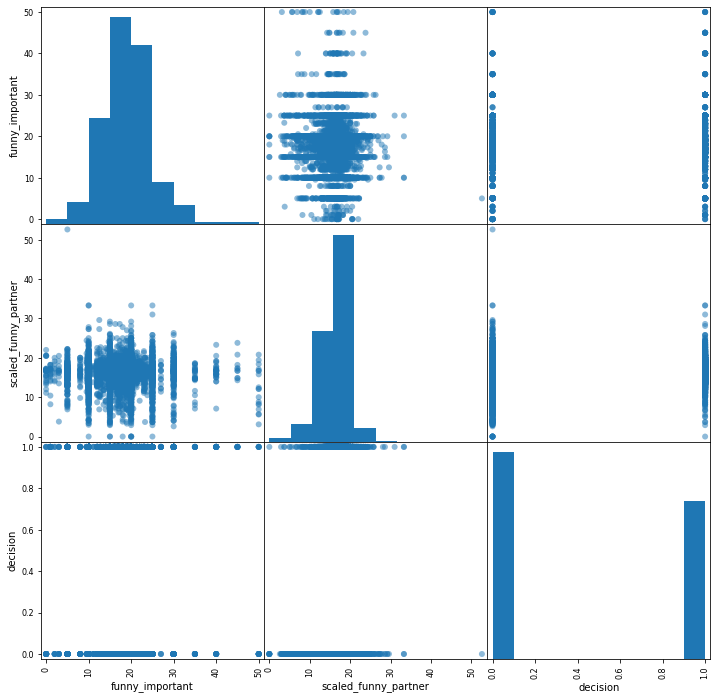

In [ ]:
pd.plotting.scatter_matrix(df[['funny_important','scaled_funny_partner', 'decision']], figsize=[12, 12], marker=12);

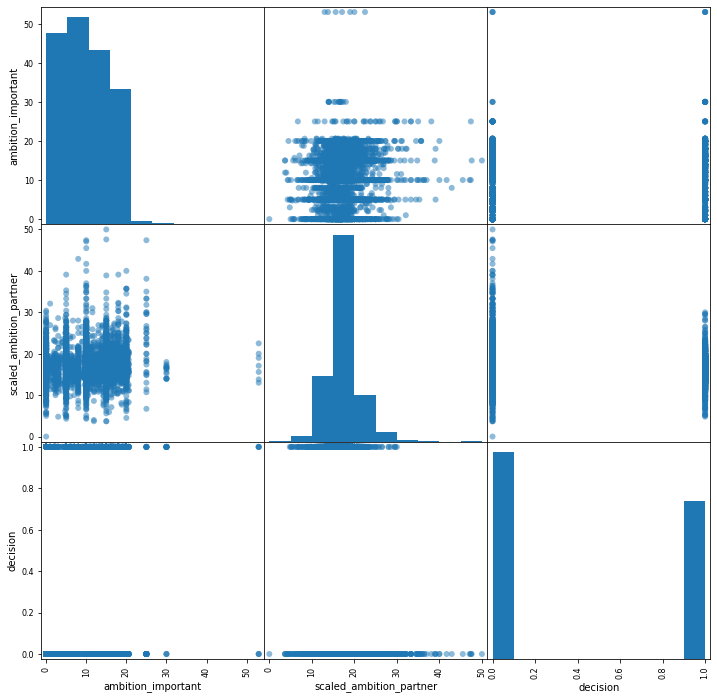

In [ ]:
pd.plotting.scatter_matrix(df[['ambition_important','scaled_ambition_partner', 'decision']], figsize=[12, 12], marker=12);

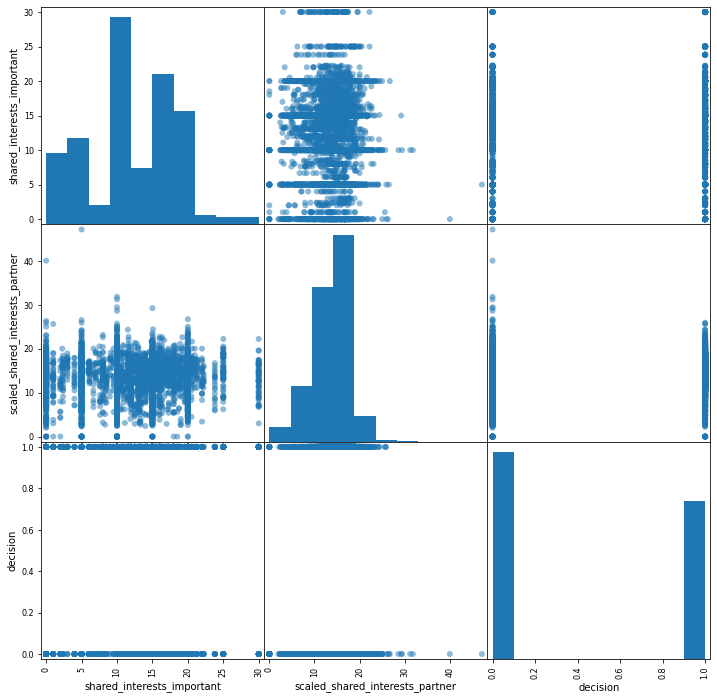

In [ ]:
pd.plotting.scatter_matrix(df[['shared_interests_important','scaled_shared_interests_partner', 'decision']], figsize=[12, 12], marker=12);

Unfortunately, scaling the ratings and standardizing the data did not provide more helpful information about the relationship between attribute importance, rating, and decision.

# **Ethics & Privacy**

To address ethics and privacy, our project strives to be equitable, respect individual privacy and consent, and ensure no harm is done. The data does not contain personally identifiable information which allows for anonymity. In order to be transparent, the model will be interpretable and demonstrate how we came to each decision which will make it possible to appeal these model decisions. Even though data privacy is very important, it will not be our primary ethical concern, for the data we have sourced are publically available on the internet.

The research question does bring up ethical concerns, in particular, the possibility of inadvertently tracking racial preference and discrimination in our exploration of what makes someone more attractive when speed dating. There can be negative implications with this information being used for nefarious purposes, such as suggesting one racial group to be more attractive than another. Our research question can have the unintended consequence of lowering an individual’s self-image if they do not possess the attributes that are found to make one more attractive or matchable. Another ethical consideration for our analysis is the possibility of generalizing males and females and what attributes they find to be important. 

A disclaimer will need to be included if any post-analysis is done using our data or findings and it is published and made available to the public. This is so no harm is done from this information. Since the data is coming from an individual’s preference, there will be some form of cultural bias present in the data. 

# **Conclusion & Discussion**

Our project primarily involves the exploration of speed dating preference and matching patterns among men and women participants (if there were any at all). Seeing that we had valuable data about each participant's preference among the six attributes and their matching, we decided to analyze what attributes are relatively more important to men and women during speed dating and if the weighted ratings of certain attributes have an effect on the participant's decision to match with their partner.

In order to answer our first question, we generated a series of histograms looking at each attribute’s rated importance for men and women. As we predicted, attractiveness was found to be most important to men in the dataset, both evident in the mean attractive_important score (26.48) and in the histogram (the only attribute to not start at 0 and have results reaching 100%). In contrast, intelligence was found to be most important to women in the dataset, both evident in the mean intelligence_important score (20.92) and the histogram (the attribute with the highest spike and the only attribute with percentages over 50%).
	
To determine which attributes play a larger role in determining whether the participant would like to meet their partner again ('decision' column), we used logistic regression to find the weights of attribute ratings on the decision. After doing logisitic regression, we found that male and females value attractiveness the most, with a weight of 0.72 and 0.46 respectively. While males value intelligence the least with a weight of 0.06, while females value sincerity the least with a weight of 0.10. Interestingly, the weights of these attributes on their final decision differ from what the participants themselves believed to be important in their partner. Males were consistent in that attractiveness was the most important attribute and also held the most weight in their final decision. However, the least important attribute (ambition) was not consistent with the least weighted rating as intelligence actually had the least amount of weight in their decision. Females were inconsistent in that it was actually attractiveness that had the most weight in their decision and not intelligence which was the attribute that we found to be most important to females. Shared interests was the least important attribute for females but it was sincerity that had the least weight in their decision to match with their partner. The preferences of certain attributes over others was not reflected in the weights of ratings on the eventual decision to match or not with their partner. **As a result, we reject our hypothesis.**

Our project and analysis have some evident limitations. Firstly, the removal of the rows with null values means that the results are not as accurate since we lost data and lowered our scope. Secondly, our score for the genders on both the train and test set was around 0.74-0.75. Since our score is not perfect, we must say that our analysis on the weights is not complete. In addition, the decision column is based on the first encounter with their partner. Thus, our project determines the importance of certain attributes on the first impression of a person. We also cannot generalize our findings (or conclude any findings) to the larger population and claim that men and women definitively find one attribute more important than another, or that one attribute is most important out of all. This is due to the inconclusivity of our results and the small sample of data we used in our analysis.

Despite these limitations, our project and analysis opens doors for more interesting questions to be explored. Our work has some notable and historical insights on dating in American society. With our analysis, we gain a better understanding of the dynamic of men and women in the realm of speed dating, as well as the intermingling of participants’ attributes in their matches. We hope that with time, more ethically obtained data relating to speed dating and similar topics, are collected and become publicly available so that we may answer more interesting questions like the one posed in this project of ours. Future considerations also include collecting and analyzing more diverse, representative, and inclusive data that cover a broad variety of participants that identify with different races, genders, and sexualities.

# **Team Contributions**

Jiaming Li: Research Question, Ethics and Privacy Writeup, Data Visualization (Stacked barplots & Color Schemes), EDA/Analysis Writeup, Conclusion and Discussion Writeup (Limitations), Hypothesis Writeup, Presentation Slides (Theme, Hypothesis, Data Analysis & Results), Final Project Formatting

Alex Nguyen: Research Question, Data Visualization, Data Cleaning, Data Visualization (Histograms and Barplots), Conclusion and Discussion Writeup (Linear Regression), Final Project (Logistic Regression)

Carolyn Duong: Research Question, Overview Writeup, Data Cleaning Writeup, EDA/Analysis Writeup, Conclusion and Discussion Writeup, Presentation Slides (Conclusion & Discussion)

Samantha Susanto: Research Question, Fixed Typos in DataSet, Age histogram & Important Attribute writeup, Final Writeup (Background & Previous Work, Hypothesis), Scaled Ratings Coding, Attribute Breakdown Graph Coding, Presentation Slides (Background, Hypothesis & Dataset), GitHub

Theresa Sobocinski: Research Question, Prior Work Writeup
